# Gaussian Process With 2-D Inputs
Most obvious example is approximation of geospatial functions.

In [98]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

x1_base = [0,2,4,6,8,10,12,14,16,0,2,4,6,8,10,12,14,16]
x2_base = np.random.randint(0,20,len(x1_base))

X = list(zip(x1_base, x2_base))
X = np.array(X)

y = np.array([-54,-60,-62,-64,-66,-68,-70,-72,-74,-60,-62,-64,-66,
                    -68,-70,-72,-74,-76])

y=-y

# Input space
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(.30, (1e-5, 1e5)) * RBF([5,5], (1e-4, 1e4))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

/home/admin/Desktop/virtual_environments/standard_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


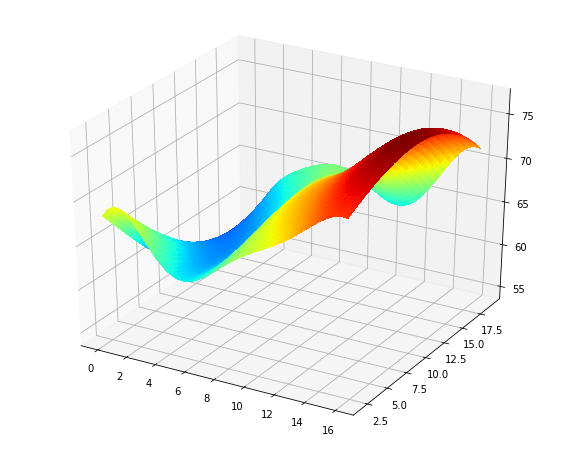

In [99]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')            
surf = ax1.plot_surface(X0p, X1p, Zp, rstride=1, cstride=1, cmap='jet', linewidth=0, antialiased=False)

plt.show()

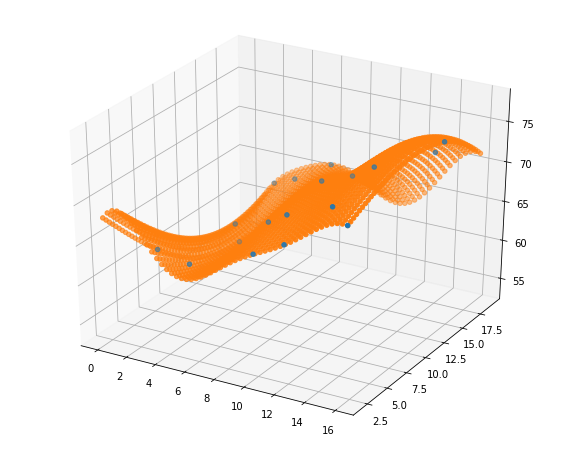

In [100]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')            
surf = ax1.scatter(x1_base, x2_base, y)
surf2 = ax1.scatter(X0p, X1p, Zp)
plt.show()

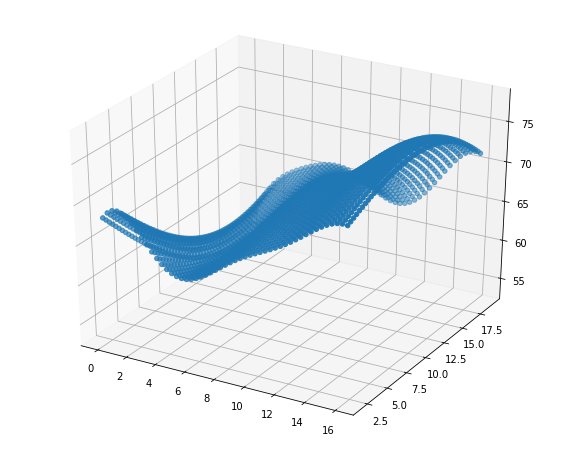

In [101]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')            
surf = ax1.scatter(X0p, X1p, Zp)

plt.show()

In [23]:
np.shape(y_pred)

(2500,)

In [26]:
np.shape(X0p)

(50, 50)